In [101]:
# Setup
%pylab inline # Show images in notebook
import matplotlib
import numpy as np
from PIL import Image

Populating the interactive namespace from numpy and matplotlib


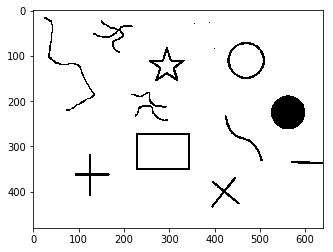

In [102]:
# Open Image
filename = 'sobel.jpg'
im = Image.open('sobel.jpg')
matplotlib.pyplot.imshow(im) # Check that image loaded properly

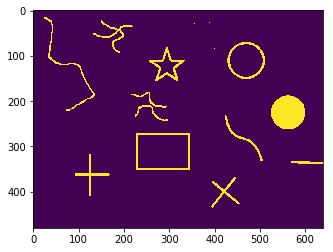

In [103]:
# Image Prep
im = np.array(im) # Change to Numpy Array
im = im[:,:,0] # From RGB to Grayscale
im = np.invert(im) # Invert Colors
matplotlib.pyplot.imshow(im) # Make sure numpy inverted colors

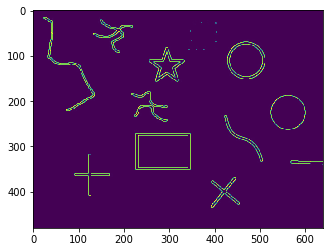

In [104]:
# Sobel Algorithm
w = im.shape[0] # Get Width
h = im.shape[1] # Get Height
imtot = np.zeros((w,h)) # Initialize New Image
for i in range(w-1): # Sobel Algoritm
    for j in range(h-1):
        if i > 0 and i < w-1 and j > 0 and j < h-1:
            x = im[i+1][j+1] + im[i+1][j]*2 + im[i+1][j+1] - im[i-1][j+1] - im[i-1][j]*2 - im[i-1][j-1]
            y = im[i-1][j-1] + im[i][j-1]*2 + im[i+1][j-1] - im[i-1][j+1] - im[i][j+1]*2 - im[i+1][j+1]
            imtot[i][j] = np.sqrt(x**2 + y**2)
matplotlib.pyplot.imshow(imtot) # Show Results of Sobel